# <center> Escuela de ML y DL Módulo 1 </center> 
##  <center> Tarea 3. K-vecinos más cercanos (k - Nearest Neighbors) </center>
##  <center> Arnoldo Fernando Chue Sánchez </center>
##  <center> arnoldwork20@gmail.com </center>
##  <center> Marzo de 2024 </center>

## Contenido 
1. Planteamiento del problema
2. Planteamiento de la solución
    * Preprocesamiento de los datos
        * Preparar los datos
        * Limpieza de los datos
        * Dividir los datos en la matriz X y el vector de etiquetas Y
        * Manejo de datos categóricos y numéricos
    * Creación de los modelos vistos en la sesión
    * Búsqueda del mejor modelo (búsqueda en malla con partición de n partes para encontrar la k óptima, junto con los mejores parámetros para el modelo)
3. Análisis del desempeño con diferentes métricas del modelo de la sesión y el modelo óptimo
4. Conclusiones 
5. Referencias

# 1. Planteamiento del problema

*Haciendo uso del notebook presentado en la Sesión kNN (P3-KNN.ipynb) y del conjunto de datos de pozos profundos en Michoacán, crea y entrena un modelo de k-NN con una k óptima. Emplea el método GridSearchCV para encontrar dicha k. Por último, compara los resultados con los obtenidos en la sesión del Módulo I, presentando las gráficas que consideres apropiadas para mostrar los resultados de cada método.*

Teniendo estas intrucciones, será importante tener en consideración lo siguiente:
- Debemos encontrar la k óptima con el método GridSearchCV para el modelo visto en la sesión donde estudiamos k-NN

Por lo tanto, debemos limpiar igual que en la sesión el dataframe de pozos profundos. 

Ahora bien, adicionalmente a la K personalmente quiero encontrar la mejor métrica para determinar la distancia entre las instancias.

# 2. Planteamiento de la solución

## Preprocesamiento de los datos

En esta sección es sumamente importante que lo hagamos igual que en la sesión. Porque si hacemos alguna modificación, el modelo se comportará diferente y por consiguiente tendremos resultados distintos al evaluar sus desempeños.

### Preparar los datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer

In [2]:
PATH = "./datasets/"

In [3]:
pozos = pd.read_excel(PATH + "Pozos_Michoacan.xlsx")

In [4]:
pozos.head()

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,1,837156,"19°58'36.0006""","-101°16'41.0007""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0,AGRICOLA
1,2,836988,"19°59'22.0004""","-101°16'30.0003""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0,AGRICOLA
2,3,836992,"20°02'22.0006""","-101°09'00.0005""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0,AGRICOLA
3,4,836822,"20°01'50.0005""","-101°09'38.0006""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0,AGRICOLA
4,5,835739,"19°49'11.0005""","-101°08'37.0006""",MICHOACÁN DE OCAMPO,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0,SERVICIOS


In [5]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   1363 non-null   int64  
 1   Título              1363 non-null   object 
 2   Latitud             1363 non-null   object 
 3   Longitud            1363 non-null   object 
 4   Estado              1363 non-null   object 
 5   Municipio           1363 non-null   object 
 6   RegiónHidrológica   1363 non-null   object 
 7   Cuenca              1363 non-null   int64  
 8   AcuíferoHomologado  1363 non-null   object 
 9   Volumen (m3/año)    1363 non-null   float64
 10  Uso                 1363 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 117.3+ KB


### Limpieza de los datos

**Nota:** como estos pasos de preprocesamiento de los datos son exactamente los mismos que los de la libreta estudiada en la sesión, no los comentaré ampliamente.

Cambiamos el tipo de dato de las columnas object a string

In [4]:
columnas = ['Título', 'Latitud', 'Longitud', 'Estado', 'Municipio', 'RegiónHidrológica', 'AcuíferoHomologado', 'Uso']
pozos[columnas] = pozos[columnas].astype("string")

Hacemos algunas correcciones de los datos

In [5]:
pozos["Uso"].replace("AGROINDUSTIAL", "AGROINDUSTRIAL", inplace=True)

C:\Users\arnol\AppData\Local\Temp\ipykernel_22876\1913440386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pozos["Uso"].replace("AGROINDUSTIAL", "AGROINDUSTRIAL", inplace=True)


Eliminamos duplicados

In [6]:
pozos['AcuíferoHomologado'].replace('1602  - MORELIA-QUERENDARO', '1602 - MORELIA-QUERENDARO', inplace = True)

C:\Users\arnol\AppData\Local\Temp\ipykernel_22876\979450133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pozos['AcuíferoHomologado'].replace('1602  - MORELIA-QUERENDARO', '1602 - MORELIA-QUERENDARO', inplace = True)


Eliminamos las columnas que no aportan información

In [7]:
pozos.drop(['#', 'Estado', "Título"], axis = 1, inplace = True)

Usamos la función del notebook de la sesión para darle formato a las columnas de latitud y longitud.

In [8]:
def to_seconds(coords, start_deg = 0, start_min=2, start_sec=4):
    
    coords = (coords  # eliminar identificadores de grados, minutos y segundos
              .replace('°', '')
              .replace("'", '')
              .replace('"', '')
             )
    
    result = 1
    if coords[0] == '-':  # negative coordinates
        result = -1
        start_deg += 1
        start_min += 1
        start_sec += 1

    result *= 3_600*float(coords[start_deg : start_min]) + 60*float(coords[start_min : start_sec]) + float(coords[start_sec : ])
    
    return result

In [9]:
pozos[['Latitud']] = pozos[['Latitud']].map(to_seconds)
pozos[['Longitud']] = pozos[['Longitud']].map(to_seconds, start_deg = 0, start_min=3, start_sec=5)

Revisamos que el dataframe final nos quede igual para seguir con la actividad

In [12]:
pozos.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,71916.0006,-364601.0007,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0,AGRICOLA
1,71962.0004,-364590.0003,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0,AGRICOLA
2,72142.0006,-364140.0005,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0,AGRICOLA
3,72110.0005,-364178.0006,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0,AGRICOLA
4,71351.0005,-364117.0006,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0,SERVICIOS


In [13]:
pozos.describe()

,Latitud,Longitud,Cuenca,Volumen (m3/año)
count,1363.000000,1363.000000,1363.000000,1.363000e+03
mean,71490.946855,-364096.132121,28.546588,1.558366e+05
std,645.397221,721.149748,67.485278,3.884465e+05
min,68005.000000,-371361.000000,0.000000,0.000000e+00
25%,71118.004800,-364411.500000,0.000000,1.500000e+04
50%,71468.000000,-364145.000000,0.000000,4.668000e+04
75%,71938.250000,-363778.000000,0.000000,1.621800e+05
max,79260.000000,-362170.000000,188.000000,1.103760e+07


### Dividir los datos en la matriz X y el vector de etiquetas Y

In [10]:
X = pozos.iloc[:,:-1]
Y = pozos["Uso"]

In [15]:
X.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,71916.0006,-364601.0007,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0
1,71962.0004,-364590.0003,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0
2,72142.0006,-364140.0005,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0
3,72110.0005,-364178.0006,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0
4,71351.0005,-364117.0006,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0


In [16]:
Y.head()

0     AGRICOLA
1     AGRICOLA
2     AGRICOLA
3     AGRICOLA
4    SERVICIOS
Name: Uso, dtype: string

### Manejo de datos categóricos y numéricos

Vamos a codificar y escalar los datos de igual forma que lo hicimos en la sesión. Esto con el objetivo de que los datos para el modelo queden en igualdad de circunstancias y los evaluemos objetivamente. 

Sin embargo, personalmente yo no usaría el LabelEnconder para codificar las variables categóricas. Esto porque establecemos un orden entre los diferentes valores de las variables. Hacer eso en otros algoritmos no afecta tanto, pero en KNN sí podría sesgar nuestro algoritmo, dependiendo de la métrica que usemos para calcular la distancia entre instancias.

En cuanto a utilizar el MinMaxScaler o un estandarizador, en ese caso no importa porque lo que queremos es poner todas las unidades en el mismo rango del 0 al 1. Uno u otro no afectaría nuestro algoritmo

In [11]:
def codificar(data):
    cat = []
    num = []
    
    for i in data.columns:
        if data[i].dtypes == 'string':
            cat.append(i)
        elif data[i].dtypes == 'float64' or 'int64':
            num.append(i)
            
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(data[num])
    data[num] = scaled_values
    
    code = LabelEncoder()
    data[cat] = data[cat].apply(code.fit_transform)
    
    print('Columnas numéricas escaladas', num)
    print('Columnas categóricas codificadas:', cat)
    
    return data, scaler

In [12]:
Xcod, scaler = codificar(X)

Columnas numéricas escaladas ['Latitud', 'Longitud', 'Cuenca', 'Volumen (m3/año)']
Columnas categóricas codificadas: ['Municipio', 'RegiónHidrológica', 'AcuíferoHomologado']


In [20]:
Xcod.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,0.347490,0.735502,7,1,1.0,0,0.002066
1,0.351577,0.736699,7,1,1.0,0,0.000815
2,0.367570,0.785660,5,1,1.0,0,0.001814
3,0.364727,0.781525,5,1,1.0,0,0.000544
4,0.297290,0.788162,18,1,1.0,0,0.002718


## Creación de los modelos vistos en la sesión

Para evaluar en igualdad de condiciones lo hecho en la sesión vamos a dividir nuestros conjuntos de entrenamiento y prueba en 70% y 30% (igual que en la sesión).

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xcod, Y, test_size=0.3, shuffle=True)

También es importante mencionar los parámetros que vamos a tomar en cuenta antes de crear los modelos con k-NN (pueden ser más, pero estos son los que consideraré para la búsqueda en malla).
- n_neighbors: número de vecinos (valor de k)
- weights: importancia que se les da a los vecinos para la predicción. Usaremos 'uniform' (todos los vecinos son iguales) y 'distance' (los vecinos más cercanos son más importantes)
- metric: la métrica para calcular la distancia. La que viene por defecto es la euclideana, pero consideraremos también la manhattan y la del coseno.

Vemos entonces que los modelos que hicimos en la sesión son:
- k=5, weights=uniform, metric=euclidean
- k=15, weights=distance, metric=euclidean 

Sólo vamos a crear el segundo (el de la k = 15) porque es el que se consideró como el "óptimo" durante la sesión

In [14]:
knn15DistanceEuclidean = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean')
knn15DistanceEuclidean.fit(Xtrain, Ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

## Búsqueda del mejor modelo (búsqueda en malla con partición de n partes para encontrar la k óptima, junto con los mejores parámetros para el modelo)

Para la función GridSearchCV no sólo le tenemos que dar el modelo, sino también los parámetros y la métrica de clasificación con la que queremos que encuentre el mejor modelo.

Tomemos como métrica para la búsqueda en malla la f1. Hay que ponerle micro en el average porque queremos el promedio de las f1 de cada clase que tenemos.

In [15]:
def f1_multiclase(Ytest, Ypred):
    return f1_score(Ytest, Ypred, average='micro')

Sobre los parámetros...

Para la primer búsqueda en malla haremos lo siguiente: como el objetivo del trabajo es encontrar la k óptima, vamos a darle los mismos parámetros de peso y métricas que se usaron para el modelo de la sesión. Posteriormente sí haremos una búsqueda en malla con todas las combinaciones de parámetros.

In [29]:
params = {
    "n_neighbors": range(1, 101), # nótese que aquí sí consideramos a las k pares porque nuestra clasificación no es biclase (en ese caso no es recomendable tomar una k par por los posibles empates)
    "weights": ['distance'],
    "metric": ['euclidean']
}

In [30]:
gridKOptima = GridSearchCV(KNeighborsClassifier(), params, scoring=make_scorer(f1_multiclase), cv=10)

In [31]:
%%time
gridKOptima.fit(Xtrain, Ytrain)

c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CPU times: total: 8.39 s
Wall time: 8.39 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'], 'n_neighbors': range(1, 101),
                         'weights': ['distance']},
             scoring=make_scorer(f1_multiclase, response_method='predict'))

Veamos la k óptima para el modelo.

In [32]:
gridKOptima.best_params_

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}

La mejor k es 12, ligeramente menos a la del modelo original

In [33]:
gridKOptima.best_score_

0.7001535087719298

Aquí podemos ver que el promedio de la f1 en todas las clases es muy bueno: 70.01%.

Guardemos entonces el modelo.

In [34]:
modelKOptima = gridKOptima.best_estimator_

Como la búsqueda en malla no fue tardada vamos a realizar otra, pero ahora con las combinaciones de varias métricas de distancia (euclidiana, coseno y manhattan) y las opciones de darles pesos a los vecinos.

In [35]:
params = {
    "n_neighbors": range(1, 101), 
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan', 'cosine']
}

In [36]:
gridCompleta = GridSearchCV(KNeighborsClassifier(), params, scoring=make_scorer(f1_multiclase), cv=10)

Nótese que la validación cruzada de n partes la hacemos con 10 para que la búsqueda sea significativa

In [37]:
%%time
gridCompleta.fit(Xtrain, Ytrain)

c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CPU times: total: 1min 13s
Wall time: 1min 11s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': range(1, 101),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_multiclase, response_method='predict'))

Veamos la mejor configuración en este caso

In [38]:
gridCompleta.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

Este modelo al parecer sube la k hasta 17, mantiene el peso de los vecinos de acuerdo a su distancia con la instancia a evaluar y utiliza la distancia Manhattan en lugar de la Euclidiana

Veamos qué valor para la f1 obtuvo

In [39]:
gridCompleta.best_score_

0.7054166666666667

70.54% ligeramente superior a la k óptima con los parámetros de la sesión

In [40]:
modelCompleto = gridCompleta.best_estimator_

En seguida vamos a comenzar a analizar los modelos ya con los datos de prueba.

# 3. Análisis del desempeño con diferentes métricas del modelo de la sesión y el modelo óptimo

Una vez terminados los pasos anteriores contamos con 3 modelos candidatos: el que hicimos en la sesión, el que busca la k óptima para los parámetros de la sesión y el óptimo de todas las combinaciones de parámetros

Para estudiar esta comparación vamos en un inicio a adaptar la función *prediction* que tenemos en el notebook de la sesión.

In [41]:
def prediction(model, X, y):
    pred = model.predict(X)
    y_pred = pd.Series(pred, index=y.index)
    
    print('Exactitud = ', accuracy_score(y, y_pred))
    print('Sensibilidad = ', recall_score(y, y_pred, average='micro'))
    print('Precision = ', precision_score(y, y_pred, average='micro'))
    print('F1 = ', f1_score(y, y_pred, average='micro'))
    print(classification_report(y, pred, zero_division=0))

    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    _ = plt.xticks(rotation='vertical')
    plt.show()
    
    return y_pred

Veamos entonces el desempeño de los 3 modelos con los conjuntos de prueba para decidirnos por el modelo final. 

Modelo sesión:
- K = 15
- weights = distance
- metric = euclidean

Exactitud =  0.6356968215158925
Sensibilidad =  0.6356968215158925
Precision =  0.6356968215158925
F1 =  0.6356968215158925
                 precision    recall  f1-score   support

       AGRICOLA       0.71      0.82      0.76       212
DIFERENTES USOS       0.10      0.04      0.06        26
      DOMESTICO       0.00      0.00      0.00         9
     INDUSTRIAL       0.73      0.84      0.78        38
       PECUARIO       0.00      0.00      0.00         2
 PUBLICO URBANO       0.52      0.53      0.52        95
      SERVICIOS       0.29      0.15      0.20        27

       accuracy                           0.64       409
      macro avg       0.33      0.34      0.33       409
   weighted avg       0.58      0.64      0.60       409



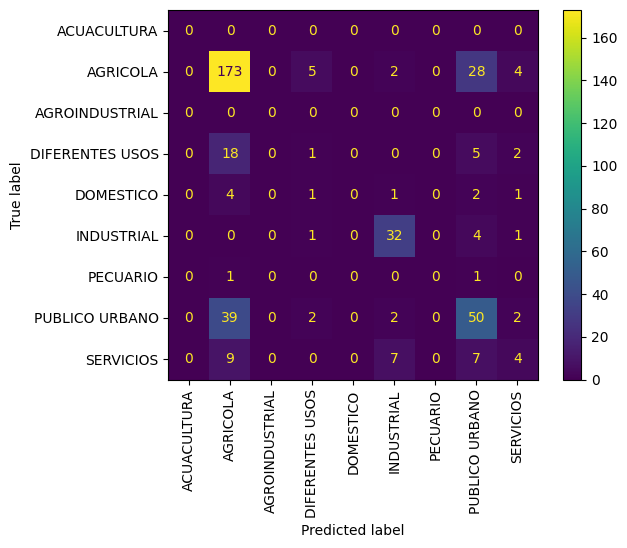

In [43]:
YpredSesion = prediction(knn15DistanceEuclidean, Xtest, Ytest)

Modelo k óptima con parámetros de la clase:
- K = 12
- weights = distance
- metric = euclidean

Exactitud =  0.6308068459657702
Sensibilidad =  0.6308068459657702
Precision =  0.6308068459657702
F1 =  0.6308068459657702
                 precision    recall  f1-score   support

       AGRICOLA       0.72      0.81      0.76       212
DIFERENTES USOS       0.09      0.04      0.05        26
      DOMESTICO       0.00      0.00      0.00         9
     INDUSTRIAL       0.71      0.84      0.77        38
       PECUARIO       0.00      0.00      0.00         2
 PUBLICO URBANO       0.51      0.52      0.51        95
      SERVICIOS       0.29      0.19      0.23        27

       accuracy                           0.63       409
      macro avg       0.33      0.34      0.33       409
   weighted avg       0.58      0.63      0.60       409



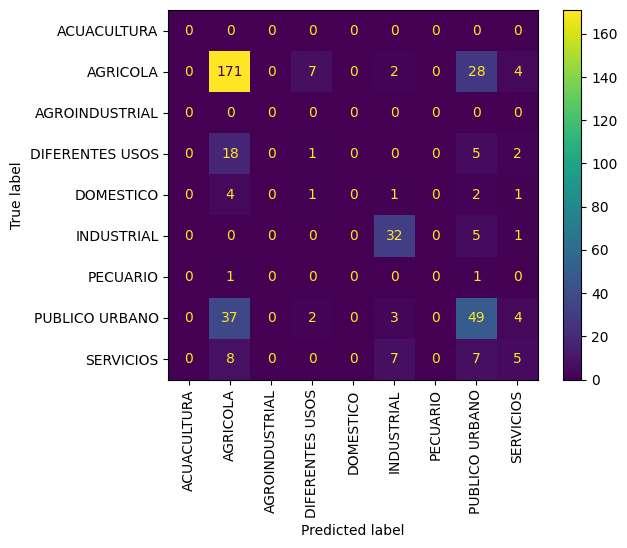

In [46]:
YpredKOptima = prediction(modelKOptima, Xtest, Ytest)

Modelo óptimo para combinación de parámetros:
- K = 17
- weights = distance
- metric = manhattan

Exactitud =  0.6356968215158925
Sensibilidad =  0.6356968215158925
Precision =  0.6356968215158925
F1 =  0.6356968215158925
                 precision    recall  f1-score   support

       AGRICOLA       0.71      0.83      0.77       212
DIFERENTES USOS       0.12      0.04      0.06        26
      DOMESTICO       0.00      0.00      0.00         9
     INDUSTRIAL       0.68      0.84      0.75        38
       PECUARIO       0.00      0.00      0.00         2
 PUBLICO URBANO       0.52      0.51      0.51        95
      SERVICIOS       0.25      0.15      0.19        27

       accuracy                           0.64       409
      macro avg       0.33      0.34      0.32       409
   weighted avg       0.58      0.64      0.60       409



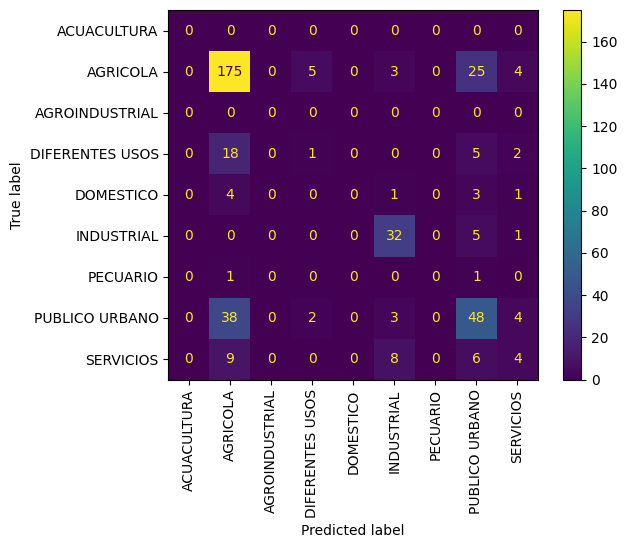

In [48]:
YpredCompleto = prediction(modelCompleto, Xtest, Ytest)

Analizando los resultados...

Lo primero que hay que ver son los errores en la matriz de confusión, es decir, aquellas malas clasificaciones en las que el modelo se equivocó.

Y en los 3 modelos vemos el mismo patrón: al modelo se le pasaron muchos casos de "diferentes usos" y "servicios". A la mayoría de esas clases las clasificó como "agrícola", esto podría indicar un sesgo en los modelos hacia esa clase (lo cual es muy probable porque es la clase con más instancias en el dataset). 

Además también se confundió entre las categorías "agrícola" y "público urbano": tanto clasificó varios agrícolas como público urbano, como varios público urbano los clasificó como agrícolas.

El hecho de que en los 3 modelos se hayan equivocado de la misma manera nos indica que hemos llegado al límite de estos modelos de k vecinos más cercanos. Si se quisiera mejorar el desempeño del modelo se tendrían que buscar más datos para mejorar el entrenamiento, o bien, cambiar de algoritmo. Esto porque los errores son iguales independientemente de la configuración del modelo.

Ahora bien, en cuanto a determinar cuál es el mejor modelo de entre los 3.

Las métricas son muy similares al punto que literalmente son las mismas para el modelo de la sesión y el modelo con diferentes parámetros. El modelo con la supuesta k óptima para las configuraciones de la sesión bajó su rendimiento al momento de darle el conjunto de prueba. Si bien no es una caída drástica en las métricas sí podríamos considerar que al buscar la k óptima sobreajustamos ligeramente el modelo. 

Sin embargo, dado que las diferencias entre las métricas globales del modelo no son significativas, aquí la decisión de cuál modelo es mejor se debe tomar con base en dónde se cometieron los errores, o bien, cuál modelo tuvo los aciertos que más nos convengan (las métricas por categoría).

Retomando el análisis exploratorio de los datos hecho en la sesión. Sabemos que los 3 tipos de pozo con mayor cantidad de metros cúbicos de agua son:
1. Agrícola
2. Industrial
3. Público Urbano

Por lo tanto, nos interesarán más los errores y aciertos en estas categorías. Si nos fijamos en las f1 de esas clases en cada modelo para analizarlo:

| Uso | Modelo Sesión | Modelo k óptima | Modelo parámetros completos |
|--------------|--------------|--------------|--------------|
| Agrícola    | 0.76    | 0.76    | 0.77    |
| Industrial    | 0.78    | 0.77    | 0.75    |
| Público Urbano   | 0.52    | 0.51    | 0.51    |


Comparando el modelo de la sesión con el modelo de la k óptima entendemos por qué salió el segundo con su métricas ligeramente más bajas: los errores con los posos industriales y públicos-urbanos hicieron que bajara su rendimiento global. 

Además, comparándolos puntualmente, ambos modelos tuvieron los mismos aciertos en industrial, pero el de la k óptima tuvo 2 aciertos menos en agrícola y 1 menos en público urbano.

Por lo tanto, podemos descartar el modelo de la k óptima para ser nuestro mejor modelo. Demostrando de paso que buscar una k óptima sólo con los datos de entrenamiento puede llevar al sobreajuste.

Ahora hagamos la comparación para decidirnos por el modelo final: el modelo de la sesión o el modelo optimizado con los parámetros completos.

Si comparamos sus f1 por categoría el modelo de los parámetros completos sólo supera al modelo de la sesión en una categoría: la agrícola. En todas las demás categorías empatan o el de la sesión es superior. Sin embargo, esa superioridad en la f1 de los pozos agrícolas le basta al modelo de los parámetros completos para igualar las métricas del modelo de la sesión.

Ahora bien, para complementar nuestra decisión podemos ver la sensibilidad de cada modelo en estas 3 variables de nuestra clase a predecir. Esto porque el criterio de desempate que estamos tomando es que el modelo clasifique correctamente los títulos de los pozos más importantes. De hecho la sensibilidad nos interesa mucho más que la precisión, porque de nada nos sirve que cuando nos dé las clases que nos interesan nos garantice que sí sean lo que nos dice, si se le "pasan" la mayoría de las clases que nos interesan.

Recall (sensibilidad) por modelo en cada categoría:

| Uso | Modelo Sesión | Modelo parámetros completos |
|--------------|--------------|--------------|
| Agrícola    | 0.82    | 0.83    |
| Industrial    | 0.84    | 0.84    |
| Público Urbano   | 0.53    |  0.51    |

Aquí podemos ver que la diferencia de 0.01 en el agrícola equivale a lo mismo que 0.02 en el público urbano al momento de hacer la ponderación con los ejemplos dados de cada categoría.

En este punto perfectamente se podría escoger cualquiera de los dos de forma válida y se tendrían casi los mismos resultados. Personalmente yo tomaré el modelo de los parámetros completos como el modelo ganador porque la diferencia en metros cúbicos de agua entre los pozos agrícolas y los públicos urbanos sí es mucha (casi el doble).

Si bien las f1 y las sensibilidades por categoría están en equilibrio, finalmente les voy a dar más peso a las de los pozos agrícolas. Esto en cantidad de aciertos al observar las matrices de confusión, se traduce en que prefiero los dos aciertos extras que tuvo el modelo de los parámetros completos en la categoría agrícola, que los dos que tuvo el modelo de la sesión en los pozos públicos-urbanos.

# 4. Conclusiones

Si nos vamos exclusivamente al objetivo inicial de este trabajo (decidir la k óptima para esto modelo) podemos decir que 17 fue el número ganador. Sin embargo, decir esto sin un contexto completo de la práctica se traduce en una conclusión muy pobre.

Para empezar, determinar la k de los k vecinos más cercanos no se traduce en encontrar un sólo número. Por el comportamiento de los modelos al pasar de un conjunto de datos a otro (aun del mismo dataframe) vemos que la k puede variar. Dicho de forma más apropiada: la k para el algoritmo de k vecinos más cercanos es un intervalo más que un sólo número. En este caso vemos que un posible intervalo de buen funcionamiento para la k fue de 12 a 17.

Sin embargo, otro aspecto fundamental para la optimización de nuestro algoritmo se encuentra en los parámetros que van a acompañar a la k. El valor de k no va a ser el mismo si tomamos la distancia euclidiana que la distancia del coseno. Tampoco será la misma k si consideramos los vecinos más cercanos uniformemente a que si les damos un peso determinado. Por lo tanto, al optimizar este algoritmo vale mucho la pena tomarse el tiempo de buscar los parámetros que más se adapten a nuestro conjunto de datos.

Para trabajos futuros con este mismo set de datos valdría la pena probar otros algoritmos de aprendizaje automático para ver si logran solucionar la confusión entre las categorías que más problemas causaron a nuestros modelos.

Por otro lado, para continuar con los modelos presentados aquí lo que valdría la pena hacer sería ampliar el conjunto de datos con más información sobre los pozos para mejorar los resultados. Otra buena opción sería verificar el rendimiento de estos modelos ahora con pozos de agua de otros estados u otras categorías.

# 5. Referencias

Además de consultar el material de la sesión sobre el algoritmo de K vecinos más cercanos, se consultaron las siguientes secciones de la documentación de Scikit-Learn:

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter